# Required Imports for dataset creation

In [2]:
import cv2
import mediapipe as mp

import csv
import os
import numpy as np
import pandas as pd

# Find dataset directory

In [3]:
# Creating an empty dictionary to store the image paths for dataset
alphabets = {}

# path of the train images directory
base_dir = './asl_alphabet_train'
train_dir = os.path.join(base_dir, 'asl_alphabet_train')

# storing the paths of train images that are present in the sub directories
# since all the train images are orgnanized in subfolder with respective letter names, we need to first get those folder paths 
list_subfolders_with_paths = [f.path for f in os.scandir(train_dir) if f.is_dir()]
list_subfolders_with_paths

['./asl_alphabet_train\\asl_alphabet_train\\A',
 './asl_alphabet_train\\asl_alphabet_train\\B',
 './asl_alphabet_train\\asl_alphabet_train\\C',
 './asl_alphabet_train\\asl_alphabet_train\\D',
 './asl_alphabet_train\\asl_alphabet_train\\del',
 './asl_alphabet_train\\asl_alphabet_train\\E',
 './asl_alphabet_train\\asl_alphabet_train\\F',
 './asl_alphabet_train\\asl_alphabet_train\\G',
 './asl_alphabet_train\\asl_alphabet_train\\H',
 './asl_alphabet_train\\asl_alphabet_train\\I',
 './asl_alphabet_train\\asl_alphabet_train\\J',
 './asl_alphabet_train\\asl_alphabet_train\\K',
 './asl_alphabet_train\\asl_alphabet_train\\L',
 './asl_alphabet_train\\asl_alphabet_train\\M',
 './asl_alphabet_train\\asl_alphabet_train\\N',
 './asl_alphabet_train\\asl_alphabet_train\\nothing',
 './asl_alphabet_train\\asl_alphabet_train\\O',
 './asl_alphabet_train\\asl_alphabet_train\\P',
 './asl_alphabet_train\\asl_alphabet_train\\Q',
 './asl_alphabet_train\\asl_alphabet_train\\R',
 './asl_alphabet_train\\asl_alph

In [4]:
for i in list_subfolders_with_paths:
    # ignoring 'del', 'space', 'nothing' and only taking A-Z
    if i.split('\\')[2] not in ['del', 'space', 'nothing']:
        alphabets[i.split('\\')[2]] = [f.path for f in os.scandir(i) if f.path.endswith('.jpg')]

alphabets

{'A': ['./asl_alphabet_train\\asl_alphabet_train\\A\\A1.jpg',
  './asl_alphabet_train\\asl_alphabet_train\\A\\A10.jpg',
  './asl_alphabet_train\\asl_alphabet_train\\A\\A100.jpg',
  './asl_alphabet_train\\asl_alphabet_train\\A\\A1000.jpg',
  './asl_alphabet_train\\asl_alphabet_train\\A\\A1001.jpg',
  './asl_alphabet_train\\asl_alphabet_train\\A\\A1002.jpg',
  './asl_alphabet_train\\asl_alphabet_train\\A\\A1003.jpg',
  './asl_alphabet_train\\asl_alphabet_train\\A\\A1004.jpg',
  './asl_alphabet_train\\asl_alphabet_train\\A\\A1005.jpg',
  './asl_alphabet_train\\asl_alphabet_train\\A\\A1006.jpg',
  './asl_alphabet_train\\asl_alphabet_train\\A\\A1007.jpg',
  './asl_alphabet_train\\asl_alphabet_train\\A\\A1008.jpg',
  './asl_alphabet_train\\asl_alphabet_train\\A\\A1009.jpg',
  './asl_alphabet_train\\asl_alphabet_train\\A\\A101.jpg',
  './asl_alphabet_train\\asl_alphabet_train\\A\\A1010.jpg',
  './asl_alphabet_train\\asl_alphabet_train\\A\\A1011.jpg',
  './asl_alphabet_train\\asl_alphabet_trai

In [5]:
dataset = pd.DataFrame.from_dict(alphabets)
dataset

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
0,./asl_alphabet_train\asl_alphabet_train\A\A1.jpg,./asl_alphabet_train\asl_alphabet_train\B\B1.jpg,./asl_alphabet_train\asl_alphabet_train\C\C1.jpg,./asl_alphabet_train\asl_alphabet_train\D\D1.jpg,./asl_alphabet_train\asl_alphabet_train\E\E1.jpg,./asl_alphabet_train\asl_alphabet_train\F\F1.jpg,./asl_alphabet_train\asl_alphabet_train\G\G1.jpg,./asl_alphabet_train\asl_alphabet_train\H\H1.jpg,./asl_alphabet_train\asl_alphabet_train\I\I1.jpg,./asl_alphabet_train\asl_alphabet_train\J\J1.jpg,...,./asl_alphabet_train\asl_alphabet_train\Q\Q1.jpg,./asl_alphabet_train\asl_alphabet_train\R\R1.jpg,./asl_alphabet_train\asl_alphabet_train\S\S1.jpg,./asl_alphabet_train\asl_alphabet_train\T\T1.jpg,./asl_alphabet_train\asl_alphabet_train\U\U1.jpg,./asl_alphabet_train\asl_alphabet_train\V\V1.jpg,./asl_alphabet_train\asl_alphabet_train\W\W1.jpg,./asl_alphabet_train\asl_alphabet_train\X\X1.jpg,./asl_alphabet_train\asl_alphabet_train\Y\Y1.jpg,./asl_alphabet_train\asl_alphabet_train\Z\Z1.jpg
1,./asl_alphabet_train\asl_alphabet_train\A\A10.jpg,./asl_alphabet_train\asl_alphabet_train\B\B10.jpg,./asl_alphabet_train\asl_alphabet_train\C\C10.jpg,./asl_alphabet_train\asl_alphabet_train\D\D10.jpg,./asl_alphabet_train\asl_alphabet_train\E\E10.jpg,./asl_alphabet_train\asl_alphabet_train\F\F10.jpg,./asl_alphabet_train\asl_alphabet_train\G\G10.jpg,./asl_alphabet_train\asl_alphabet_train\H\H10.jpg,./asl_alphabet_train\asl_alphabet_train\I\I10.jpg,./asl_alphabet_train\asl_alphabet_train\J\J10.jpg,...,./asl_alphabet_train\asl_alphabet_train\Q\Q10.jpg,./asl_alphabet_train\asl_alphabet_train\R\R10.jpg,./asl_alphabet_train\asl_alphabet_train\S\S10.jpg,./asl_alphabet_train\asl_alphabet_train\T\T10.jpg,./asl_alphabet_train\asl_alphabet_train\U\U10.jpg,./asl_alphabet_train\asl_alphabet_train\V\V10.jpg,./asl_alphabet_train\asl_alphabet_train\W\W10.jpg,./asl_alphabet_train\asl_alphabet_train\X\X10.jpg,./asl_alphabet_train\asl_alphabet_train\Y\Y10.jpg,./asl_alphabet_train\asl_alphabet_train\Z\Z10.jpg
2,./asl_alphabet_train\asl_alphabet_train\A\A100...,./asl_alphabet_train\asl_alphabet_train\B\B100...,./asl_alphabet_train\asl_alphabet_train\C\C100...,./asl_alphabet_train\asl_alphabet_train\D\D100...,./asl_alphabet_train\asl_alphabet_train\E\E100...,./asl_alphabet_train\asl_alphabet_train\F\F100...,./asl_alphabet_train\asl_alphabet_train\G\G100...,./asl_alphabet_train\asl_alphabet_train\H\H100...,./asl_alphabet_train\asl_alphabet_train\I\I100...,./asl_alphabet_train\asl_alphabet_train\J\J100...,...,./asl_alphabet_train\asl_alphabet_train\Q\Q100...,./asl_alphabet_train\asl_alphabet_train\R\R100...,./asl_alphabet_train\asl_alphabet_train\S\S100...,./asl_alphabet_train\asl_alphabet_train\T\T100...,./asl_alphabet_train\asl_alphabet_train\U\U100...,./asl_alphabet_train\asl_alphabet_train\V\V100...,./asl_alphabet_train\asl_alphabet_train\W\W100...,./asl_alphabet_train\asl_alphabet_train\X\X100...,./asl_alphabet_train\asl_alphabet_train\Y\Y100...,./asl_alphabet_train\asl_alphabet_train\Z\Z100...
3,./asl_alphabet_train\asl_alphabet_train\A\A100...,./asl_alphabet_train\asl_alphabet_train\B\B100...,./asl_alphabet_train\asl_alphabet_train\C\C100...,./asl_alphabet_train\asl_alphabet_train\D\D100...,./asl_alphabet_train\asl_alphabet_train\E\E100...,./asl_alphabet_train\asl_alphabet_train\F\F100...,./asl_alphabet_train\asl_alphabet_train\G\G100...,./asl_alphabet_train\asl_alphabet_train\H\H100...,./asl_alphabet_train\asl_alphabet_train\I\I100...,./asl_alphabet_train\asl_alphabet_train\J\J100...,...,./asl_alphabet_train\asl_alphabet_train\Q\Q100...,./asl_alphabet_train\asl_alphabet_train\R\R100...,./asl_alphabet_train\asl_alphabet_train\S\S100...,./asl_alphabet_train\asl_alphabet_train\T\T100...,./asl_alphabet_train\asl_alphabet_train\U\U100...,./asl_alphabet_train\asl_alphabet_train\V\V100...,./asl_alphabet_train\asl_alphabet_train\W\W100...,./asl_alphabet_train\asl_alphabet_train\X\X100...,./asl_alphabet_train\asl_alphabet_train\Y\Y100...,.

# Show random image from directory

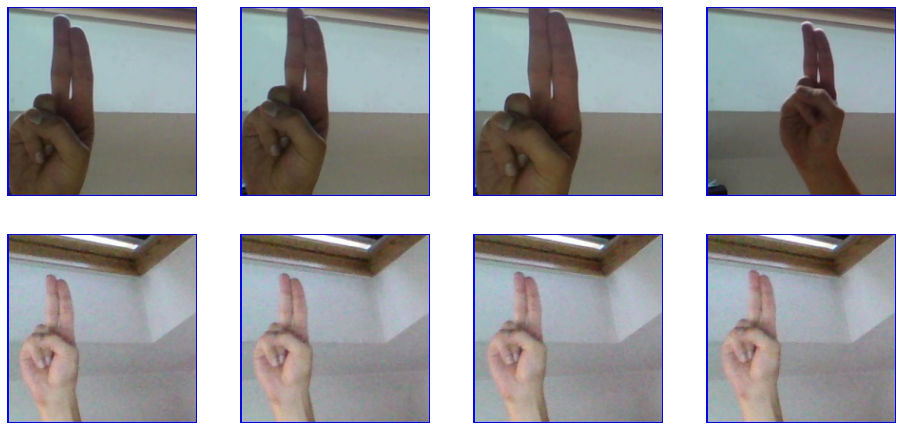

Image of alphabet U


In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import random

# Selecting a random column in train image dataset created
random_column = random.choice(list(dataset.columns))
# Selecting top 8 images in  the randomly choosen train image 
random_image_path = [i for i in list(dataset.loc[:7, random_column])]

nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

for i, img_path in enumerate(random_image_path):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') 
    
    img = mpimg.imread(img_path)
    plt.imshow(img) 

plt.show()
print('Image of alphabet ' + random_column)

# Generating dataset coordinates using MediaPipe

In [14]:
# Creating an empty dictionary to store alphabets along with thier image paths
file_list = {}

# Taking 1000 train images out of 3000 images per letter, the more the better the accuracy
target_success = 5

# Creatinf a subset dataset considering a margin of the images available in the original dataset
# These 1500 images are used for training the model, we can take more than 1500 but our target sucess is 1000 so 
# the margin for 1500 is enaf, if we consider taking 2500 for training then we can take subset train images as 3000 that
# is max images per letter
data = dataset.loc[:100]

for idx in data:
    file_list[idx] = data[idx].values
file_list

{'A': array(['./asl_alphabet_train\\asl_alphabet_train\\A\\A1.jpg',
        './asl_alphabet_train\\asl_alphabet_train\\A\\A10.jpg',
        './asl_alphabet_train\\asl_alphabet_train\\A\\A100.jpg',
        './asl_alphabet_train\\asl_alphabet_train\\A\\A1000.jpg',
        './asl_alphabet_train\\asl_alphabet_train\\A\\A1001.jpg',
        './asl_alphabet_train\\asl_alphabet_train\\A\\A1002.jpg',
        './asl_alphabet_train\\asl_alphabet_train\\A\\A1003.jpg',
        './asl_alphabet_train\\asl_alphabet_train\\A\\A1004.jpg',
        './asl_alphabet_train\\asl_alphabet_train\\A\\A1005.jpg',
        './asl_alphabet_train\\asl_alphabet_train\\A\\A1006.jpg',
        './asl_alphabet_train\\asl_alphabet_train\\A\\A1007.jpg',
        './asl_alphabet_train\\asl_alphabet_train\\A\\A1008.jpg',
        './asl_alphabet_train\\asl_alphabet_train\\A\\A1009.jpg',
        './asl_alphabet_train\\asl_alphabet_train\\A\\A101.jpg',
        './asl_alphabet_train\\asl_alphabet_train\\A\\A1010.jpg',
        './a

# Creating Dataset header

In [12]:
# Creating dataset header

landmarks = ['class']
for val in range(1, 22):
    landmarks += ['x{}'.format(val), 'y{}'.format(val)]
landmarks

['class',
 'x1',
 'y1',
 'x2',
 'y2',
 'x3',
 'y3',
 'x4',
 'y4',
 'x5',
 'y5',
 'x6',
 'y6',
 'x7',
 'y7',
 'x8',
 'y8',
 'x9',
 'y9',
 'x10',
 'y10',
 'x11',
 'y11',
 'x12',
 'y12',
 'x13',
 'y13',
 'x14',
 'y14',
 'x15',
 'y15',
 'x16',
 'y16',
 'x17',
 'y17',
 'x18',
 'y18',
 'x19',
 'y19',
 'x20',
 'y20',
 'x21',
 'y21']

In [13]:
# Creating a csv file and writing header for hand co-ordinates

with open('hand_datasett.csv', mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(landmarks)

# Initialize mediapipe hand model

In [15]:
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

In [19]:
# Creating a Hand Model

hands = mp_hands.Hands( static_image_mode=True, 
                       max_num_hands=2, 
                       min_detection_confidence=0.5)

In [17]:
for idx, files in file_list.items():
    success = 0

    for file in files : 
        
        # Read an image, flip it around y-axis for correct handedness output 
        image = cv2.flip(cv2.imread(file), 1)
        
        # Converting the BGR image to RGB before processing.
        results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        if success < target_success:
            try :
                # Extract Hand landmarks

                for hand_landmark in results.multi_hand_landmarks:
                    right_hand = hand_landmark.landmark

                right_hand_row = list(np.array([[landmark.x, landmark.y] for landmark in right_hand]).flatten())

                # Concating rows
                row = right_hand_row

                # Appending class name 
                row.insert(0, file.split('\\')[2])

                # Exporting to CSV
                with open('hand_datasett.csv', mode='a', newline='') as f:
                    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                    csv_writer.writerow(row) 

                success += 1

            except :
                pass

            #Print handedness and draw hand landmarks on the image.

#                 print('Handedness:', results.multi_handedness)
#                 if not results.multi_hand_landmarks:
#                   continue
#                 image_height, image_width, _ = image.shape
#                 annotated_image = image.copy()
#                 for hand_landmarks in results.multi_hand_landmarks:
#                   print('hand_landmarks:', hand_landmarks)
#                   print(
#                       f'Index finger tip coordinates: (',
#                       f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
#                       f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height})'
#                   )
#                   mp_drawing.draw_landmarks(
#                       annotated_image, hand_landmarks, mp_hands.HAND_CONNECTIONS)

#                 if not os.path.exists('tmp'):
#                     os.mkdir('./tmp')

#                 cv2.imwrite('./tmp/' + file.split('\\')[2] + str(idx) + '.png', cv2.flip(annotated_image, 1))
        else :
            break